In [13]:
from utils.SaxImage import SAXImage
from utils.LaxImage import LAXImage
import SimpleITK as sitk
import os
import numpy as np
import cv2
from skimage import transform
from torchvision import transforms
import torch

subject = "../Dataset/Subjects/1030914/image/time001"

SAX_PATH = os.path.join(subject, "SAX")
LAX_PATH = os.path.join(subject, "LAX")
LAX_2CH_PATH = os.path.join(LAX_PATH, "2CH", '0001')
LAX_3CH_PATH = os.path.join(LAX_PATH, "3CH", '0001')
LAX_4CH_PATH = os.path.join(LAX_PATH, "4CH", '0001')

SaxImage = SAXImage(SAX_PATH)
SaxImage_array = SaxImage.pixel_array()
SaxImage_array = (SaxImage_array - np.min(SaxImage_array)) / (np.max(SaxImage_array) - np.min(SaxImage_array))

try:
    Lax2CH = LAXImage(LAX_2CH_PATH)
    Lax2CH_array = Lax2CH.pixel_array()
    Lax2CH_array = (Lax2CH_array - np.min(Lax2CH_array)) / (np.max(Lax2CH_array) - np.min(Lax2CH_array))
except:
    Lax2CH = None
    Lax2CH_array = np.zeros((224, 224, 1))

try:
    Lax3CH = LAXImage(LAX_3CH_PATH)
    Lax3CH_array = Lax3CH.pixel_array()
    Lax3CH_array = (Lax3CH_array - np.min(Lax3CH_array)) / (np.max(Lax3CH_array) - np.min(Lax3CH_array))
except:
    Lax3CH = None
    Lax3CH_array = np.zeros((224, 224, 1))
    
try:
    Lax4CH = LAXImage(LAX_4CH_PATH)
    Lax4CH_array = Lax4CH.pixel_array()
    Lax4CH_array = (Lax4CH_array - np.min(Lax4CH_array)) / (np.max(Lax4CH_array) - np.min(Lax4CH_array))
except:
    Lax4CH = None
    Lax4CH_array = np.zeros((224, 224, 1))

mesh = np.load(os.path.join(subject.replace("image", "mesh"), "surface.npy"))

sample = {'SAX': SaxImage, 'LAX2CH': Lax2CH, 'LAX3CH': Lax3CH, 'LAX4CH': Lax4CH, 'Mesh': mesh,
          'Sax_Array': SaxImage_array, 'Lax2CH_Array': Lax2CH_array, 'Lax3CH_Array': Lax3CH_array, 'Lax4CH_Array': Lax4CH_array}

In [14]:
from utils.dataset import (CardiacImageMeshDataset, PadArraysToSquareShape, CropArraysToSquareShape, 
                            RandomCropBoth, RandomScalingBoth, AugColor, Rotate,
                            ToTorchTensors, AlignMeshWithSaxImage, CropSax)
 
 
all_transforms = transforms.Compose([
                                    AlignMeshWithSaxImage(),
                                    RandomScalingBoth(),
                                    Rotate(45),
                                    CropSax(),
                                    AugColor(0.5),
                                    ToTorchTensors()
                                ])

In [15]:
sample = all_transforms(sample)

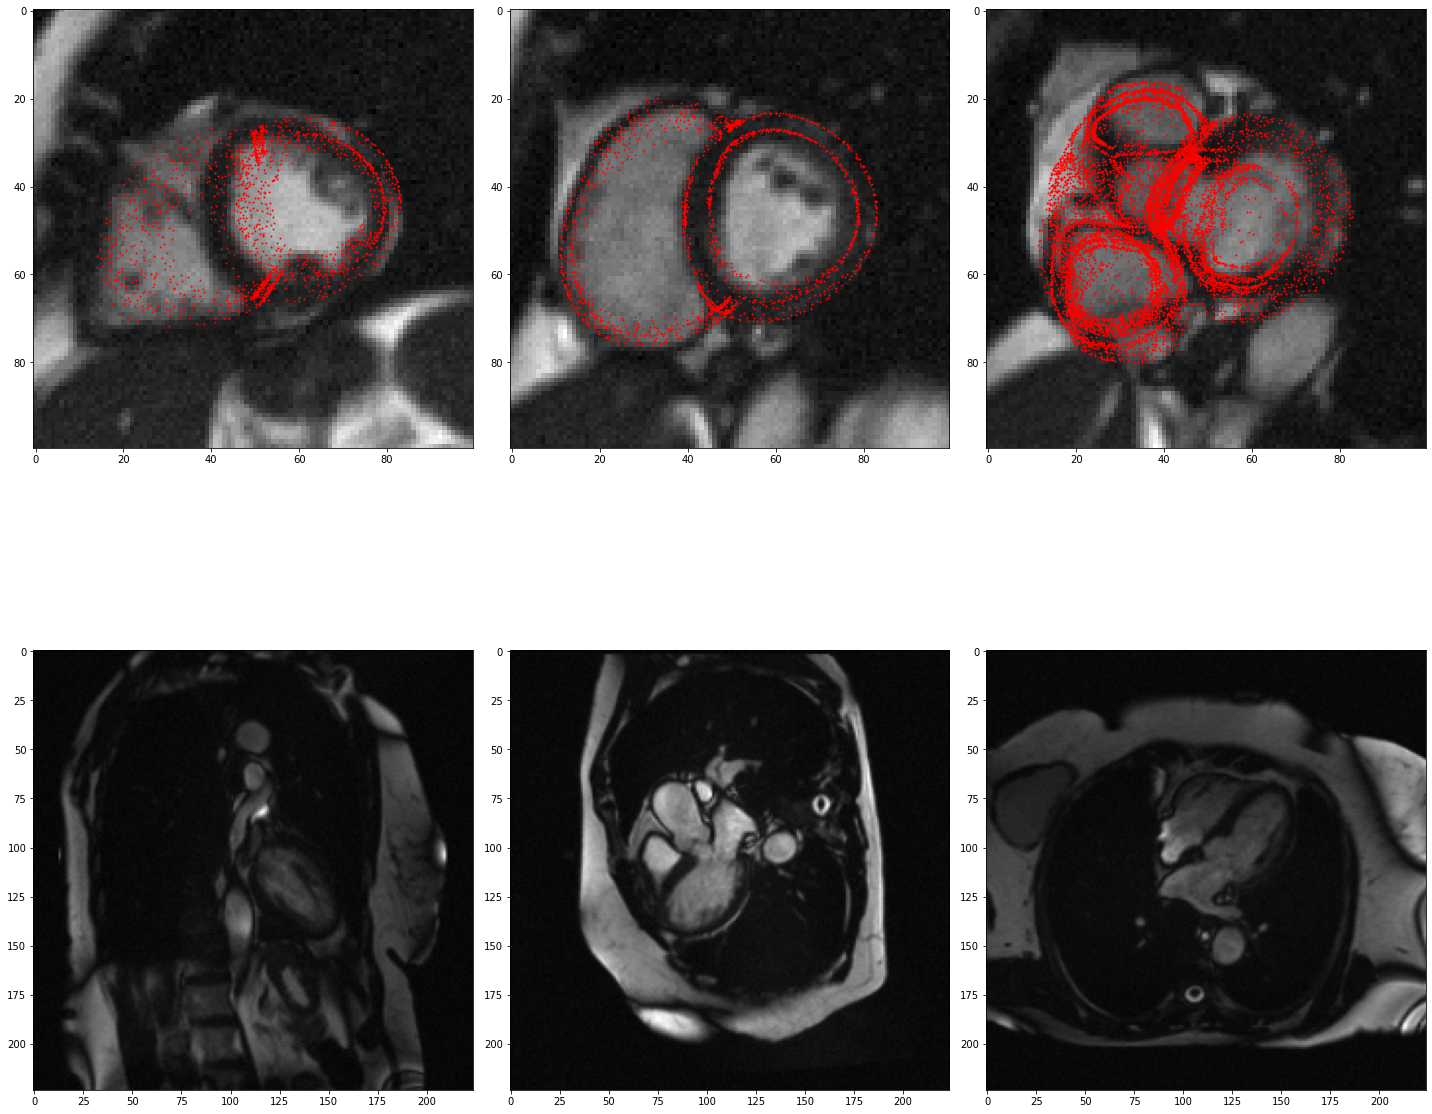

In [16]:
import matplotlib.pyplot as plt

mesh = sample["Mesh"]
m1 = mesh[:, 2] < (7 / 16) * (mesh[:, 2] > (5 / 16))
m1 = mesh[m1, :] * 100

m2 = mesh[:, 2] < (9 / 16) * (mesh[:, 2] > (7 / 16))
m2 = mesh[m2, :] * 100

m3 = mesh[:, 2] < (11 / 16) * (mesh[:, 2] > (9 / 16))
m3 = mesh[m3, :] * 100

plt.figure(figsize=(20, 20))

plt.subplot(2, 3, 1)
plt.imshow(sample["Sax_Array"][0, 7, :, :].cpu().numpy(), cmap="gray")
plt.scatter(m1[:, 0], m1[:, 1], s=1, c="red")

plt.subplot(2, 3, 2)
plt.imshow(sample["Sax_Array"][0, 9, :, :].cpu().numpy(), cmap="gray")
plt.scatter(m2[:, 0], m2[:, 1], s=1, c="red")

plt.subplot(2, 3, 3)
plt.imshow(sample["Sax_Array"][0, 11, :, :].cpu().numpy(), cmap="gray")
plt.scatter(m3[:, 0], m3[:, 1], s=1, c="red")

plt.subplot(2, 3, 4)
plt.imshow(sample["Lax2CH_Array"][0, :, :].cpu().numpy(), cmap="gray")

plt.subplot(2, 3, 5)
plt.imshow(sample["Lax3CH_Array"][0, :, :].cpu().numpy(), cmap="gray")

plt.subplot(2, 3, 6)
plt.imshow(sample["Lax4CH_Array"][0, :, :].cpu().numpy(), cmap="gray")

plt.tight_layout()
